In [30]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/guillermocepeda/C:C++/Implementacion_IA_a01284015/Entregables/Regresion_logistica/mc-donalds-menu-1.csv',sep=',')
#select "total fat" category
df = df[['Total Fat']]
df.dropna()
# drop negative values
print(df.shape[0])
df = df[df['Total Fat'] > 0]
# print size of data
print(df.shape[0])


#Utiliza la transformación Box-Cox. Utiliza el modelo exacto y el approximado de acuerdo con las sugerencias de Box y Cox para la transformación

#Transformacion Box-Cox
box_data, lambda_box = stats.boxcox(df['Total Fat'])
print(lambda_box)
#modelo exacto
def boxcox_model(x,lamb):
    if lamb == 0:
        return np.log(x)
    return (x**lamb - 1)/lamb

#modelo approximado
def boxcox_model_approx(x,lamb):
    if lamb < -1.5:
        return 1/x**2
    elif lamb < -0.75:
        return 1/x
    elif lamb < -0.25:
        return 1/np.sqrt(x)
    elif lamb < 0.25:
        return np.log(x)
    elif lamb < 0.75:
        return np.sqrt(x)
    elif lamb < 1.5:
        return x
    else:
        return x**2
    

#Transformacion de los datos
box_exact = boxcox_model(df['Total Fat'],lambda_box)
box_approx = boxcox_model_approx(df['Total Fat'],lambda_box)




260
211
0.4058796784886242


In [31]:
#Compara las medidas: Mínimo, máximo, media, mediana, cuartil 1 y cuartil 3, sesgo y curtosis.

ME_MIN = box_exact.min()
ME_MAX = box_exact.max()
ME_MEAN = box_exact.mean()
ME_MEDIAN = np.median(box_exact)
ME_Q1 = np.quantile(box_exact,0.25)
ME_Q3 = np.quantile(box_exact,0.75)
ME_SKEW = box_exact.skew()
ME_KURTOSIS = box_exact.kurtosis()

MA_MIN = box_approx.min()
MA_MAX = box_approx.max()
MA_MEAN = box_approx.mean()
MA_MEDIAN = np.median(box_approx)
MA_Q1 = np.quantile(box_approx,0.25)
MA_Q3 = np.quantile(box_approx,0.75)
MA_SKEW = box_approx.skew()
MA_KURTOSIS = box_approx.kurtosis()

print("Mínimo exacto: ",ME_MIN)
print("Máximo exacto: ",ME_MAX)
print("Media exacto: ",ME_MEAN)
print("Mediana exacto: ",ME_MEDIAN)
print("Cuartil 1 exacto: ",ME_Q1)
print("Cuartil 3 exacto: ",ME_Q3)
print("Sesgo exacto: ",ME_SKEW)
print("Curtosis exacto: ",ME_KURTOSIS)

print("Mínimo aproximado: ",MA_MIN)
print("Máximo aproximado: ",MA_MAX)
print("Media aproximado: ",MA_MEAN)
print("Mediana aproximado: ",MA_MEDIAN)
print("Cuartil 1 aproximado: ",MA_Q1)
print("Cuartil 3 aproximado: ",MA_Q3)
print("Sesgo aproximado: ",MA_SKEW)
print("Curtosis aproximado: ",MA_KURTOSIS)

REAl_min = df['Total Fat'].min()
REAl_max = df['Total Fat'].max()
REAl_mean = df['Total Fat'].mean()
REAl_median = np.median(df['Total Fat'])
REAl_q1 = np.quantile(df['Total Fat'],0.25)
REAl_q3 = np.quantile(df['Total Fat'],0.75)
REAl_skew = df['Total Fat'].skew()
REAl_kurtosis = df['Total Fat'].kurtosis()

#Diferencias entre los modelos en porcentaje
def porcentaje(a,b):
    return (a-b)/a*100

print("Diferencia mínimos")
print("Exacto:", porcentaje(ME_MIN,REAl_min),"%","Aproximado:", porcentaje(MA_MIN,REAl_min),"%")
print("Diferencia máximos")
print("Exacto:", porcentaje(ME_MAX,REAl_max),"%","Aproximado:", porcentaje(MA_MAX,REAl_max),"%")
print("Diferencia medias")
print("Exacto:", porcentaje(ME_MEAN,REAl_mean),"%","Aproximado:", porcentaje(MA_MEAN,REAl_mean),"%")
print("Diferencia medianas")
print("Exacto:", porcentaje(ME_MEDIAN,REAl_median),"%","Aproximado:", porcentaje(MA_MEDIAN,REAl_median),"%")
print("Diferencia cuartil 1")
print("Exacto:", porcentaje(ME_Q1,REAl_q1),"%","Aproximado:", porcentaje(MA_Q1,REAl_q1),"%")
print("Diferencia cuartil 3")
print("Exacto:", porcentaje(ME_Q3,REAl_q3),"%","Aproximado:", porcentaje(MA_Q3,REAl_q3),"%")
print("Diferencia sesgo")
print("Exacto:", porcentaje(ME_SKEW,REAl_skew),"%","Aproximado:", porcentaje(MA_SKEW,REAl_skew),"%")
print("Diferencia curtosis")
print("Exacto:", porcentaje(ME_KURTOSIS,REAl_kurtosis),"%","Aproximado:", porcentaje(MA_KURTOSIS,REAl_kurtosis),"%")



#Diferencias entre los modelos en porcentaje



Mínimo exacto:  -0.6041792251719319
Máximo exacto:  14.618167576328764
Media exacto:  4.806526117309361
Mediana exacto:  5.127766820515332
Cuartil 1 exacto:  3.2661357473373704
Cuartil 3 exacto:  6.4091560960363285
Sesgo exacto:  -0.006974822861329954
Curtosis exacto:  0.5290276003922809
Mínimo aproximado:  0.7071067811865476
Máximo aproximado:  10.862780491200215
Media aproximado:  3.860677145087554
Mediana aproximado:  4.0
Cuartil 1 aproximado:  2.8284271247461903
Cuartil 3 aproximado:  4.847405504439537
Sesgo aproximado:  0.30204267171505444
Curtosis aproximado:  1.0361670488279437
Diferencia mínimos
Exacto: 182.75690046404932 % Aproximado: 29.289321881345252 %
Diferencia máximos
Exacto: -707.2147167821342 % Aproximado: -986.2780491200216 %
Diferencia medias
Exacto: -263.15159591993717 % Aproximado: -352.1221445706175 %
Diferencia medianas
Exacto: -212.02666891923968 % Aproximado: -300.0 %
Diferencia cuartil 1
Exacto: -144.93776801903547 % Aproximado: -182.84271247461902 %
Diferenci

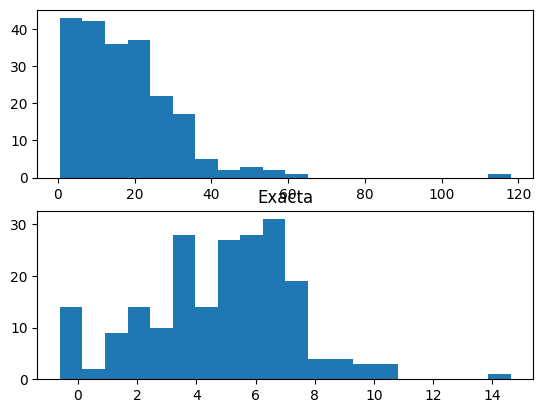

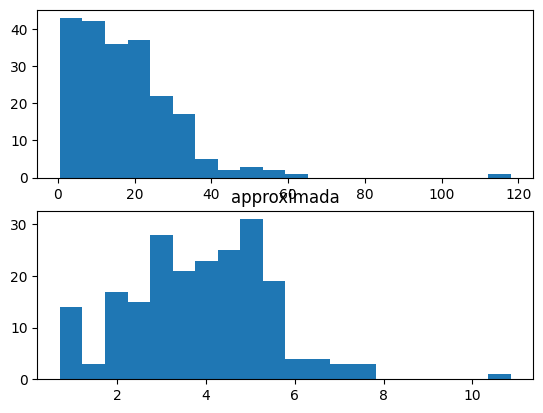

In [32]:
#Obten el histograma de los 2 modelos obtenidos (exacto y aproximado) y los datos originales.

#Histograma exacta
plt.subplot(2,1,1)
plt.hist(df['Total Fat'],bins=20)
plt.subplot(2,1,2)
plt.hist(box_exact,bins=20)
plt.title('Exacta')
plt.show()

#Histograma approximada
plt.subplot(2,1,1)
plt.hist(df['Total Fat'],bins=20)
plt.subplot(2,1,2)
plt.hist(box_approx,bins=20)
plt.title('approximada')
plt.show()

In [35]:
#Realiza la prueba de normalidad de Anderson-Darling o de Jarque Bera para los datos transformados y los originales

#Realiza la pruena para box_exact y box_approx

prueba_exacta = stats.anderson(box_exact)
prueba_approx = stats.anderson(box_approx)
print("Prueba de normalidad Anderson",prueba_exacta)
print("Prueba de normalidad Anderson",prueba_approx)




Prueba de normalidad Anderson AndersonResult(statistic=0.9793147801278224, critical_values=array([0.566, 0.644, 0.773, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=4.806526117309361, scale=2.5194209383853305)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Prueba de normalidad Anderson AndersonResult(statistic=0.6695914567639534, critical_values=array([0.566, 0.644, 0.773, 0.901, 1.072]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.860677145087554, scale=1.6007160422688034)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')


In [36]:
#Detecta anomalías y corrige tu base de datos (datos atípicos, ceros anámalos, etc).

#Rango intercuartilico
ME_IQR = ME_Q3 - ME_Q1
MA_IQR = MA_Q3 - MA_Q1

#Obtener los limites
ME_LI = ME_Q1 - 1.5*ME_IQR
ME_LS = ME_Q3 + 1.5*ME_IQR
MA_LI = MA_Q1 - 1.5*MA_IQR
MA_LS = MA_Q3 + 1.5*MA_IQR

#Obtener los datos que estan dentro de los limites
box_exact = box_exact[box_exact > ME_LI]
box_exact = box_exact[box_exact < ME_LS]
box_approx = box_approx[box_approx > MA_LI]
box_approx = box_approx[box_approx < MA_LS]

